## Random Forest

### Demo for the Concept

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

df = pd.DataFrame(X, columns = ["col1", "col2", "col3", "col4", "col5"])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.267139,-0.001659,-1.274607,1.547598,-3.589656,1
1,0.358328,5.342746,-1.194974,-0.132539,-1.696724,0
2,3.554134,-3.108811,-1.434678,0.066058,-2.205997,1
3,2.105142,0.448810,-0.715861,-0.624565,2.002116,0
4,1.604245,-1.769062,-3.407115,-0.418280,1.578288,1


In [3]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent * df.shape[0]), replace = True)

In [4]:
# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent * (df.shape[1] - 1)))
    new_df = df[cols]
    new_df["target"] = df["target"]
    return new_df

In [5]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [6]:
df1 = sample_rows(df, percent = 0.2)
df2 = sample_rows(df, percent = 0.2)
df3 = sample_rows(df, percent = 0.2)

df1.shape

(20, 6)

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.431\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.4, 0.5, 'X[0] <= -1.654\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

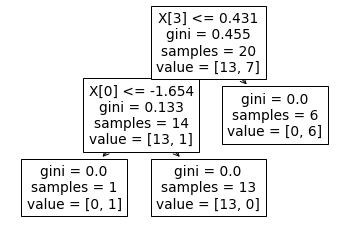

In [8]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.3333333333333333, 0.875, 'X[3] <= -1.123\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5, 0.625, 'X[4] <= 0.96\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= -2.504\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

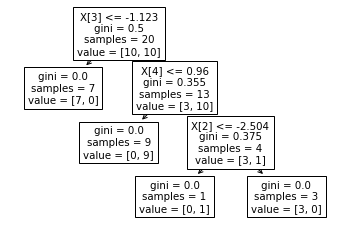

In [9]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'X[2] <= -1.996\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6, 0.5, 'X[1] <= -1.041\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

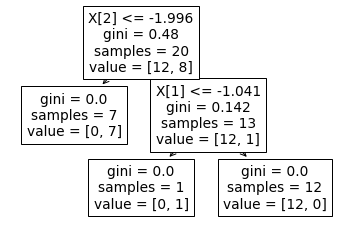

In [10]:
plot_tree(clf3)

In [11]:
print(f"clf1: {clf1.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")
print(f"clf2: {clf2.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")
print(f"clf3: {clf3.predict(np.array([-2.736812, -1.807328, -0.877387, 0.713485, 0.141199]).reshape(1, 5))}")

clf1: [1]
clf2: [1]
clf3: [1]


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# thus we can do using feature sampling as well as column and row sampling together

### Why Random Forest Performs So Well?

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape

(500, 2)

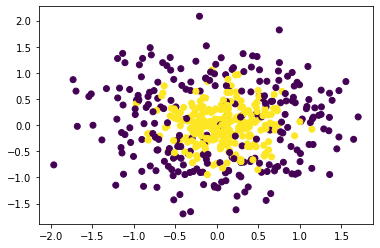

In [34]:
plt.scatter(X[:,0], X[:,1], c=y);

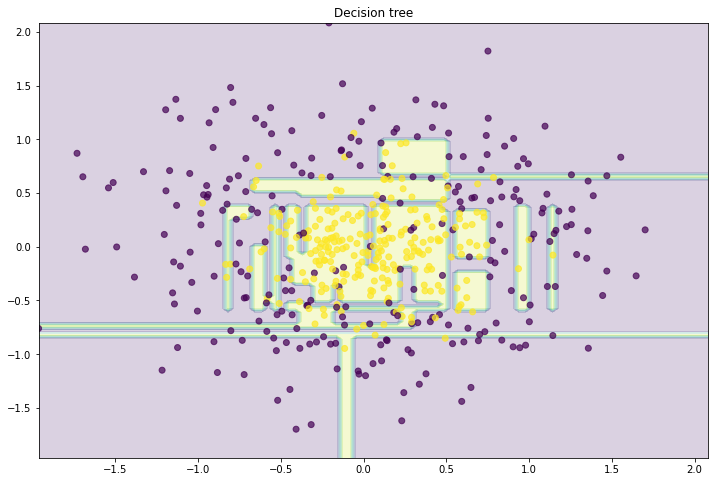

In [35]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))

x_range  = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat    = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat    = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

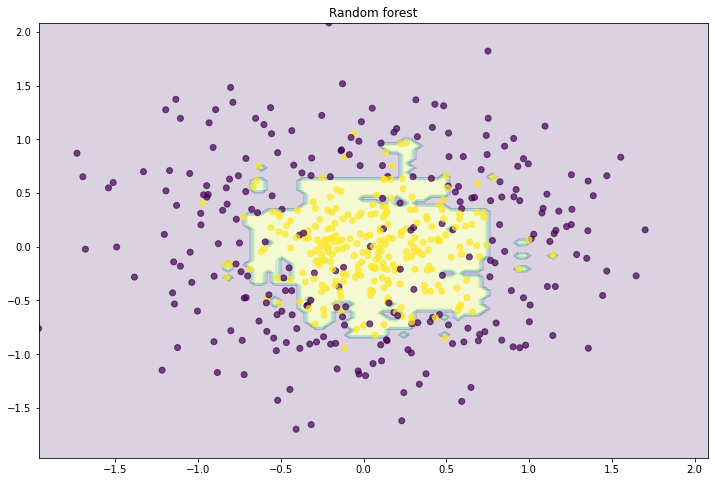

In [36]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))

x_range  = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat    = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat    = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [37]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

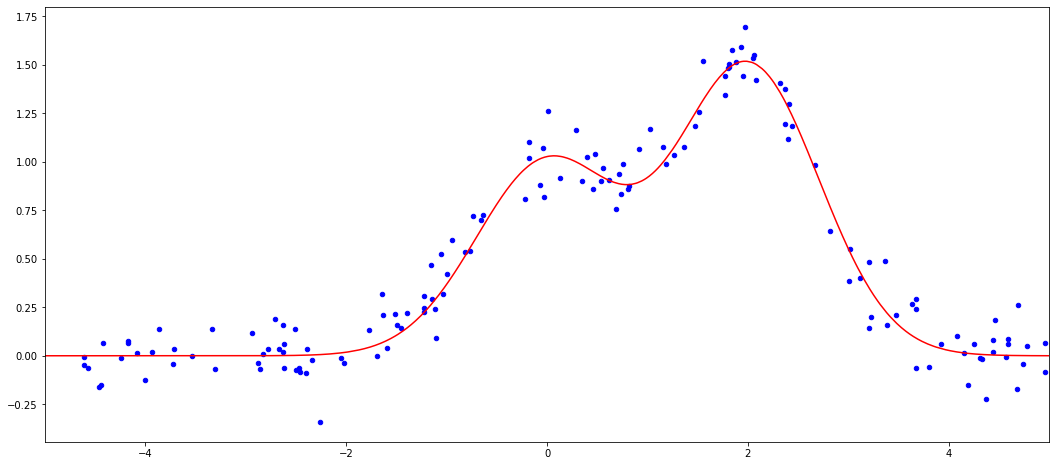

In [38]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

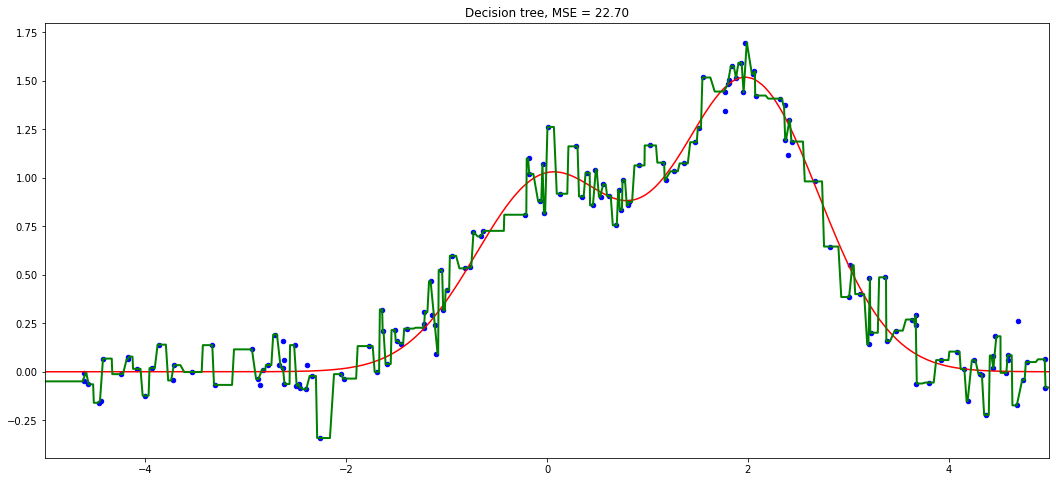

In [39]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree     = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

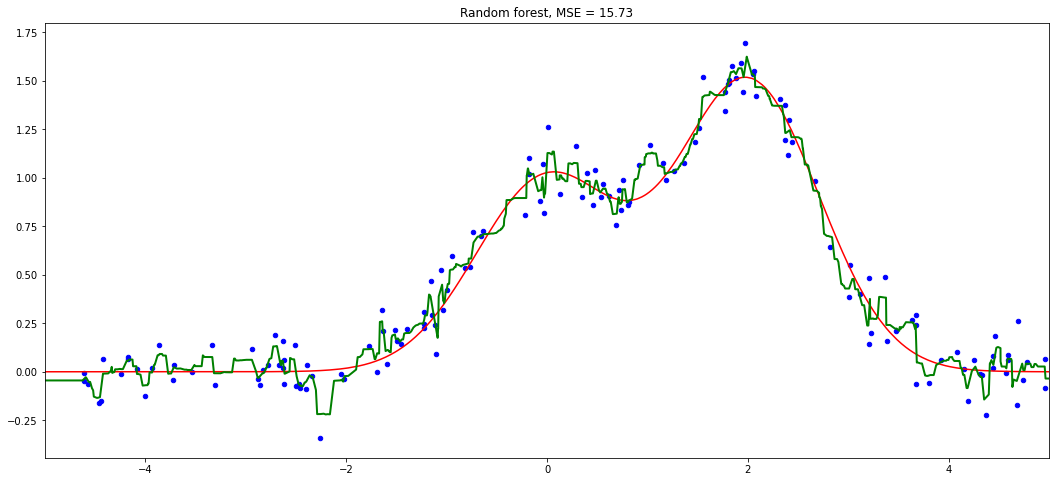

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

### Bagging vs Random Forest
- In bagging I can use different algorithms like Decision Trees, SVM, KNN etc. But in Random Forest, the Decision Trees algorithm is used.
- Feature samplining in Bagging and Random Forest is different. In Bagging the Feature Sampling is done as tree level and in Random Forest the Feature Selection is done as node level.

**See the notebook: https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day65-random-forest/bagging_vs_random_forest.ipynb**

**Bagging Sampling**
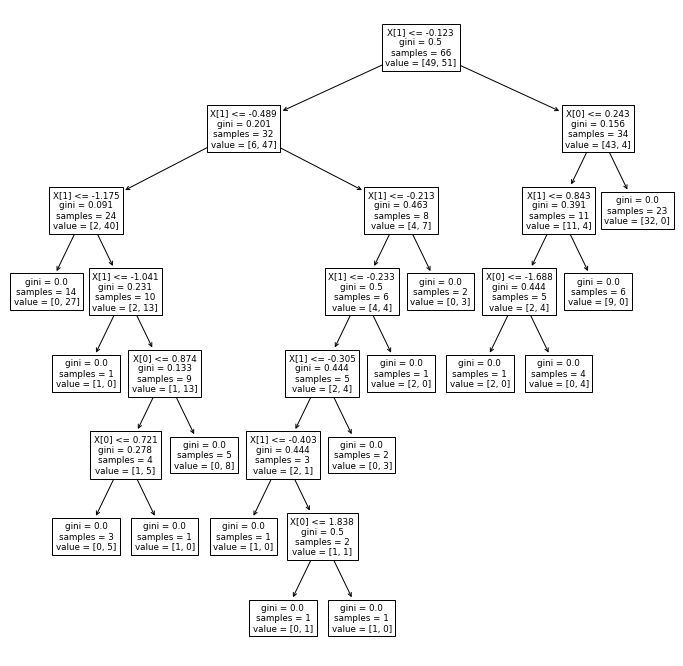

**Random Forest Sampling**
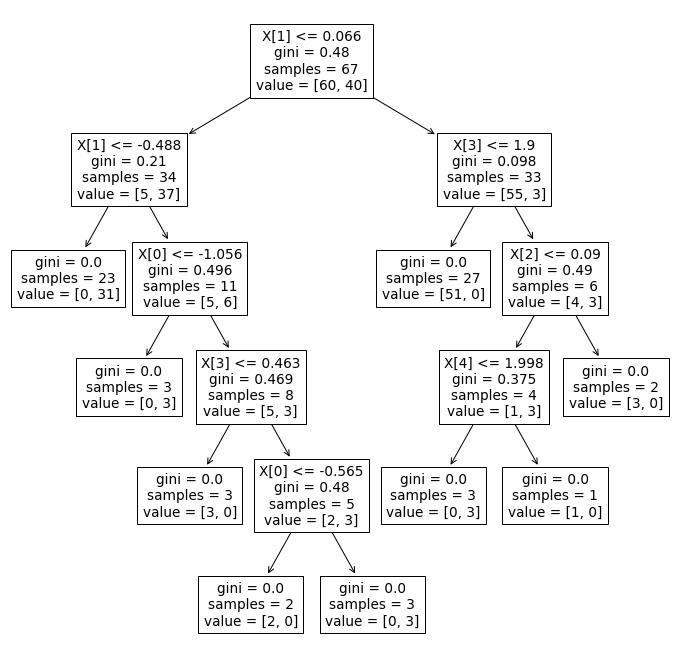

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree     import plot_tree

In [42]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [43]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.482079,1.841173,-2.217369,-2.036439,0.197381,1
1,0.380785,-0.124146,-1.401927,1.809635,-1.020447,0
2,0.270875,-1.069133,-2.016631,3.571289,-0.369521,0
3,1.405641,-1.826020,-2.905879,-0.414879,0.339778,0
4,0.854174,0.691846,-0.027003,-0.609300,-2.149680,0


In [44]:
bag = BaggingClassifier(max_features=2)

In [45]:
bag.fit(df.iloc[:,:5], df.iloc[:,-1])

BaggingClassifier(max_features=2)

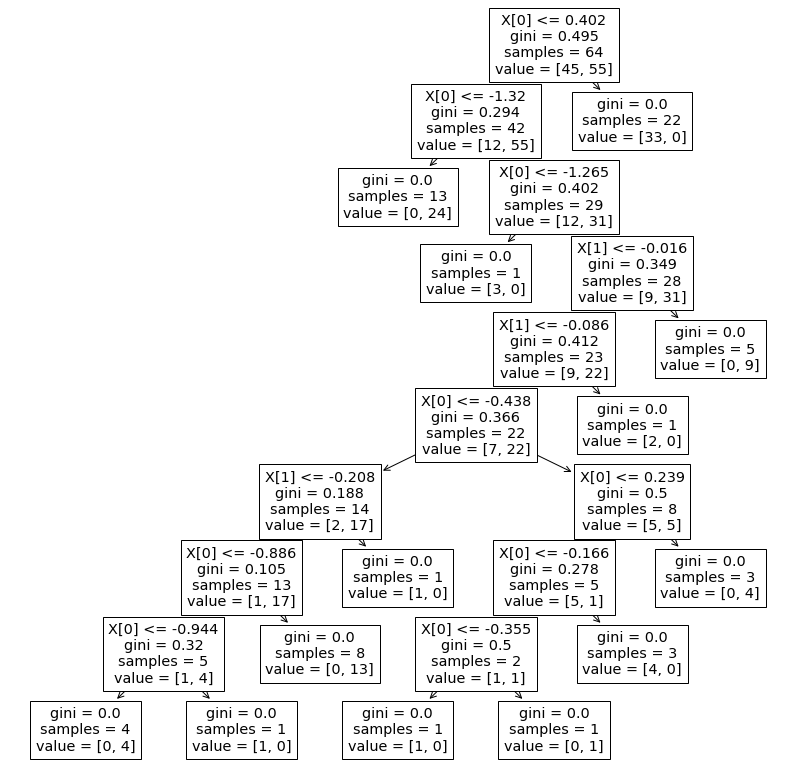

In [51]:
plt.figure(figsize=(14, 14))
plot_tree(bag.estimators_[0])
plt.show()

In [47]:
rf = RandomForestClassifier(max_features=2)

In [48]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

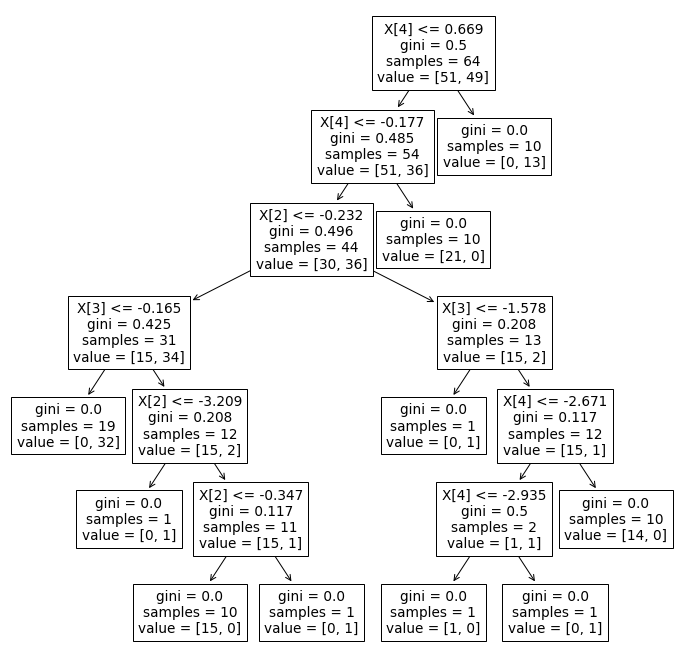

In [49]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

### Hyperparameter Tuning Using GridSearchCV & RandomizedSearchCV

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [55]:
df = pd.read_csv('../Datasets/Heart/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [59]:
rf  = RandomForestClassifier()
gb  = GradientBoostingClassifier()
svc = SVC()
lr  = LogisticRegression()

In [60]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [61]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

In [62]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7049180327868853

In [63]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [64]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9016393442622951

In [65]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.8316129032258065

#### GridSearchCV

In [66]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [67]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [68]:
rf = RandomForestClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [70]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [71]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 20}

In [72]:
rf_grid.best_score_

0.8428571428571429

#### RandomSearchCV

In [73]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [74]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [75]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [76]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\ensemble\_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switc

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [77]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [78]:
rf_grid.best_score_

0.8262755102040815

### OOB Evaluation
In *Sampling with replacement* some rows are selected for most models. But some rows are not selected and there features are not noted by any one of the models. Those non-selected rows are called *OOB (Out of Bag Samples)*. 37% rows are roughly OOB samples. So as validation you can use these data.

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv("../Datasets/Heart/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
rf = RandomForestClassifier(oob_score = True)

rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [16]:
rf.oob_score_

0.8140495867768595

In [17]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8524590163934426

## `Feature Importance` Using Random Forest & DecisionTree
Feature Importance is one of those techniques which are used for Feature Selection. You will give the score according to the importance and then you will keep those features.

According to the documentation of Scikit Learn DecitionTree Classification, the importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the `Gini importance`.

### Random Forest

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [19]:
df = pd.read_csv("../Datasets/HandWrittenDigits/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


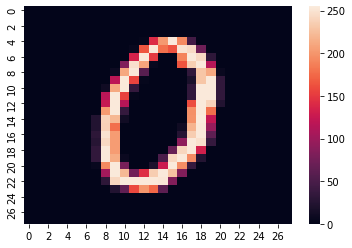

In [20]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

sns.heatmap(X.iloc[5].values.reshape(28, 28))
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X, y)

RandomForestClassifier()

In [23]:
rf.feature_importances_.shape

(784,)

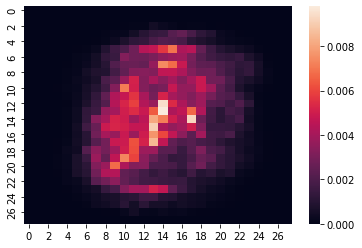

In [24]:
sns.heatmap(rf.feature_importances_.reshape(28, 28))
plt.show()

### DecisionTree

In [25]:
# DecisionTree
from sklearn.datasets import make_classification
from sklearn.tree     import DecisionTreeClassifier

In [79]:
X, y = make_classification(n_samples = 5, n_classes = 2, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 0)

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

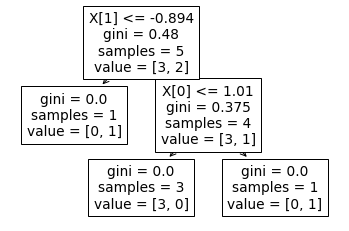

In [80]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [81]:
clf.feature_importances_

array([0.625, 0.375])

$$ni = \frac{N_t}{N}[\text{impurity} - (\frac{N_t - r}{N_t}\text{right_impurity}) - (\frac{N_t - L}{N_t}\text{left_impurity})]$$

**Have to note the formula later.**

In [29]:
X, y = make_classification(n_samples = 15, n_classes = 2, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 0)

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'X[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.625, 'X[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.444\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

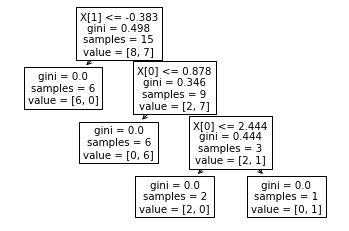

In [30]:
plot_tree(clf)

In [31]:
clf.feature_importances_

array([0.41666667, 0.58333333])